In [1]:
import mne
import numpy as np 
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt


In [2]:
_dfs_list = []
for csv_filename in tqdm(glob.glob('./KAIST/CVS_M2.csv')):
    _dfs_list.append(pd.read_csv(csv_filename,header=None))
df = pd.concat(_dfs_list)
del(_dfs_list)
#df = df.drop(['Unnamed: 0'], axis=1)
df.columns = ['sample_'+str(col) for col in df.columns]
sensor= ['Fp1-Fp3']*28+['Fp1']*23
df['sensor_postion']=sensor
subjects=[]
for i in range(0,51):
    a="subject_"+str(i)
    subjects.append(a)
#print(sensor,len(sensor))
df['subject_id']=subjects
df

100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:15<00:00, 15.66s/it]


,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_149992,sample_149993,sample_149994,sample_149995,sample_149996,sample_149997,sample_149998,sample_149999,sensor_postion,subject_id
0,6.820000,6.100000,3.930000,1.260000,0.100000,0.120000,-0.660000,-2.620000,-5.080000,-5.840000,...,6.580000,5.620000,3.640000,2.020000,1.960000,2.940000,1.19000,-3.060000,Fp1-Fp3,subject_0
1,-32.280000,-27.840000,-26.020000,-30.430000,-34.360000,-34.940000,-33.600000,-31.220000,-27.620000,-26.420000,...,-35.360000,-38.560000,-36.640000,-30.770000,-24.960000,-20.260000,-16.10000,-13.860000,Fp1-Fp3,subject_1
2,4.900000,4.380000,4.410000,7.640000,12.880000,15.190000,14.540000,11.520000,4.520000,-1.060000,...,24.180000,21.260000,18.390000,14.650000,12.390000,13.110000,12.95000,9.890000,Fp1-Fp3,subject_2
3,-3.140000,-10.630000,-16.670000,-19.680000,-17.340000,-13.020000,-5.850000,7.420000,20.710000,23.530000,...,28.380000,27.620000,28.420000,29.310000,28.650000,27.320000,25.69000,22.440000,Fp1-Fp3,subject_3
4,19.300000,19.200000,20.840000,21.610000,18.980000,15.660000,16.550000,18.780000,17.760000,17.130000,...,41.820000,37.740000,33.450000,27.700000,23.140000,20.390000,16.90000,11.910000,Fp1-Fp3,subject_4
5,786.990000,790.350000,782.500000,758.230000,740.620000,740.270000,736.000000,700.090000,654.650000,640.320000,...,-35.830000,-32.110000,-29.160000,-26.690000,-24.880000,-22.960000,-19.02000,-14.660000,Fp1-Fp3,subject_5
6,-28.050000,-31.210000,-28.020000,-18.970000,-2.790000,16.700000,25.420000,19.100000,8.980000,4.620000,...,24.920000,23.340000,23.270000,23.300000,23.560000,25.730000,28.27000,30.480000,Fp1-Fp3,subject_6
7,-4.640000,1.890000,-14.300000,-34.760000,-43.900000,-33.920000,-6.250000,14.210000,5.300000,-20.140000,...,-0.030000,17.640000,29.060000,25.640000,11.220000,-3.740000,-14.45000,-21.450000,Fp1-Fp3,subject_7
8,-33.320000,-33.900000,-33.730000,-30.530000,-26.460000,-25.680000,-26.510000,-26.570000,-26.710000,-27.600000,...,-0.350000,1.940000,10.810000,19.950000,21.360000,17.280000,14.48000,14.400000,Fp1-Fp3,subject_8
9,-36.180000,-24.350000,-23.740000,-33.480000,-36.830000,-31.640000,-30.660000,-34.630000,-35.610000,-32.150000,...,-9.710000,-9.030000,-5.000000,-7.650000,-12.400000,-10.250000,-6.16000,-7.380000,Fp1-Fp3,subject_9


In [3]:
df1=df.head(28)
df1

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_149992,sample_149993,sample_149994,sample_149995,sample_149996,sample_149997,sample_149998,sample_149999,sensor_postion,subject_id
0,6.82,6.10,3.93,1.26,0.10,0.12,-0.66,-2.62,-5.08,-5.84,...,6.58,5.62,3.64,2.02,1.96,2.94,1.19,-3.06,Fp1-Fp3,subject_0
1,-32.28,-27.84,-26.02,-30.43,-34.36,-34.94,-33.60,-31.22,-27.62,-26.42,...,-35.36,-38.56,-36.64,-30.77,-24.96,-20.26,-16.10,-13.86,Fp1-Fp3,subject_1
2,4.90,4.38,4.41,7.64,12.88,15.19,14.54,11.52,4.52,-1.06,...,24.18,21.26,18.39,14.65,12.39,13.11,12.95,9.89,Fp1-Fp3,subject_2
3,-3.14,-10.63,-16.67,-19.68,-17.34,-13.02,-5.85,7.42,20.71,23.53,...,28.38,27.62,28.42,29.31,28.65,27.32,25.69,22.44,Fp1-Fp3,subject_3
4,19.30,19.20,20.84,21.61,18.98,15.66,16.55,18.78,17.76,17.13,...,41.82,37.74,33.45,27.70,23.14,20.39,16.90,11.91,Fp1-Fp3,subject_4
5,786.99,790.35,782.50,758.23,740.62,740.27,736.00,700.09,654.65,640.32,...,-35.83,-32.11,-29.16,-26.69,-24.88,-22.96,-19.02,-14.66,Fp1-Fp3,subject_5
6,-28.05,-31.21,-28.02,-18.97,-2.79,16.70,25.42,19.10,8.98,4.62,...,24.92,23.34,23.27,23.30,23.56,25.73,28.27,30.48,Fp1-Fp3,subject_6
7,-4.64,1.89,-14.30,-34.76,-43.90,-33.92,-6.25,14.21,5.30,-20.14,...,-0.03,17.64,29.06,25.64,11.22,-3.74,-14.45,-21.45,Fp1-Fp3,subject_7
8,-33.32,-33.90,-33.73,-30.53,-26.46,-25.68,-26.51,-26.57,-26.71,-27.60,...,-0.35,1.94,10.81,19.95,21.36,17.28,14.48,14.40,Fp1-Fp3,subject_8
9,-36.18,-24.35,-23.74,-33.48,-36.83,-31.64,-30.66,-34.63,-35.61,-32.15,...,-9.71,-9.03,-5.00,-7.65,-12.40,-10.25,-6.16,-7.38,Fp1-Fp3,subject_9


In [4]:
df2=df.tail(23)
df2

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_149992,sample_149993,sample_149994,sample_149995,sample_149996,sample_149997,sample_149998,sample_149999,sensor_postion,subject_id
28,0.830000,-1.550000,-4.020000,-5.630000,-6.640000,-6.720000,-4.800000,-0.630000,5.070000,10.550000,...,1.630000,1.960000,1.670000,1.720000,2.540000,4.210000,5.92000,6.030000,Fp1,subject_28
29,18.640000,17.680000,17.210000,15.470000,12.620000,9.570000,5.820000,2.870000,2.240000,2.930000,...,-21.440000,-14.910000,-10.630000,-8.970000,-11.270000,-17.710000,-22.43000,-21.430000,Fp1,subject_29
30,9.300000,10.800000,12.300000,13.190000,13.300000,12.910000,12.430000,11.830000,10.700000,9.230000,...,-41.260000,-42.600000,-44.820000,-47.280000,-48.880000,-49.470000,-49.43000,-49.050000,Fp1,subject_30
31,32.860000,33.500000,32.820000,31.880000,31.610000,32.500000,33.910000,34.890000,35.710000,36.870000,...,138.210000,135.220000,132.430000,128.380000,124.000000,121.430000,120.40000,120.060000,Fp1,subject_31
32,114.280000,118.610000,121.210000,122.660000,122.760000,121.800000,119.920000,117.900000,117.700000,120.150000,...,-7.020000,-11.350000,-14.820000,-15.540000,-14.020000,-12.810000,-12.73000,-12.980000,Fp1,subject_32
33,16.590000,15.380000,11.090000,5.640000,2.840000,4.240000,8.240000,11.980000,14.150000,15.420000,...,25.160000,23.500000,24.650000,27.200000,30.700000,33.170000,32.87000,32.150000,Fp1,subject_33
34,7.680000,6.400000,5.880000,5.810000,5.590000,4.630000,2.600000,0.190000,-1.610000,-2.310000,...,10.650000,6.050000,-1.600000,-8.210000,-10.980000,-9.730000,-7.31000,-6.270000,Fp1,subject_34
35,-30.500000,-26.440000,-22.680000,-19.940000,-18.500000,-18.420000,-19.410000,-20.840000,-22.210000,-22.700000,...,-1.280000,-5.230000,-10.200000,-15.480000,-20.500000,-24.570000,-27.50000,-29.700000,Fp1,subject_35
36,4.157201,2.876291,1.576097,0.173499,-1.142996,-2.059524,-1.904423,-0.889210,-0.652920,-1.343951,...,1.598336,3.259139,4.778809,6.055864,7.228734,6.581883,4.88521,4.056985,Fp1,subject_36
37,84.270000,94.280000,102.980000,109.430000,114.730000,120.280000,125.740000,128.280000,128.060000,126.280000,...,7.260000,6.960000,6.990000,7.300000,7.550000,7.010000,5.42000,3.750000,Fp1,subject_37


In [5]:
ch_names = ['Fp1-Fp3']*150000
# extract the data values and the channel names
data = df1.iloc[:, :-2].values.T  # transpose the data so that channels are in rows
ch_types = ['eeg']*150000
# create the info object for the raw data
sfreq = 256  # the sampling frequency of the data in Hz
info = mne.create_info(ch_names, sfreq,ch_types)

# create the raw object
raw = mne.io.RawArray(data, info)


C:\Users\Dedu\AppData\Local\Temp\ipykernel_1288\691061180.py:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'Fp1-Fp3'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names, sfreq,ch_types)


Creating RawArray with float64 data, n_channels=150000, n_times=28
    Range : 0 ... 27 =      0.000 ...     0.105 secs
Ready.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs

In [7]:

#from mne import highpass_filter

# read in your data and create a RawArray object

# high-pass filter the data
#raw = highpass_filter(raw, 1.0)

# pick the EEG channels for ICA
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks
n_components = 20
ica = ICA(n_components=n_components, random_state=0)
ica.fit(raw, picks=picks)


Fitting ICA to data using 150000 channels (please be patient, this may take a while)


C:\Users\Dedu\AppData\Local\Temp\ipykernel_1288\3536447973.py:14: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw, picks=picks)


Selecting by number: 20 components
Fitting ICA took 109.5s.


Method,fastica
Fit,15 iterations on raw data (28 samples)
ICA components,20
Available PCA components,28
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=20, n_times=28
    Range : 0 ... 27 =      0.000 ...     0.105 secs
Ready.
Using matplotlib as 2D backend.


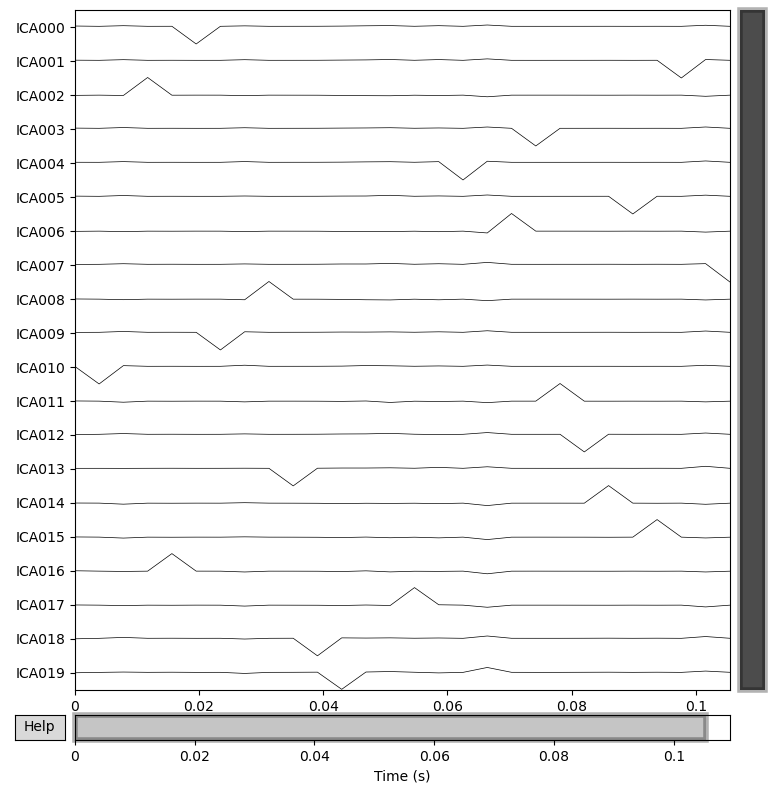

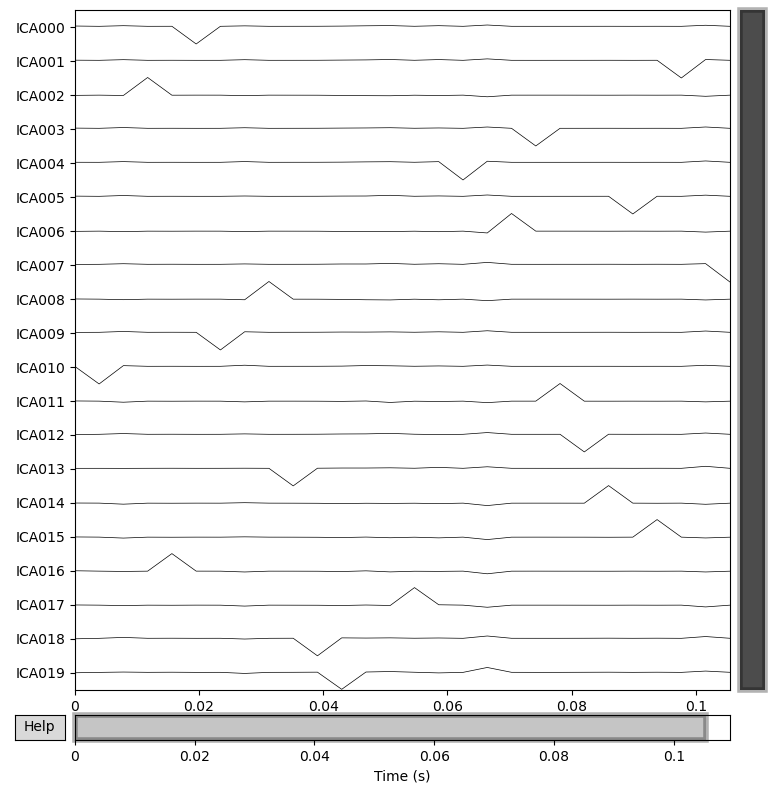

In [8]:
 ica.plot_sources(raw, block=False)

Component 0 has 52 large amplitude peaks, possibly eye blinks
Component 1 has 45 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 195, using nperseg = 195
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 377, using nperseg = 377
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 5, using nperseg = 5
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 21, using nperseg = 21
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is

Component 2 has 31 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 13, using nperseg = 13
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 401, using nperseg = 401
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 24, using nperseg = 24
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 10, using nperseg = 10
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is

Component 5 has 12 large amplitude peaks, possibly eye blinks
Component 6 has 7 large amplitude peaks, possibly eye blinks
Component 8 has 8 large amplitude peaks, possibly eye blinks
Component 9 has 6 large amplitude peaks, possibly eye blinks
Component 11 has 8 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 29, using nperseg = 29
  warnings.warn('nperseg = {0:d} is greater than input length '


Component 13 has 1 large amplitude peaks, possibly eye blinks
Component 15 has 1 large amplitude peaks, possibly eye blinks
Component 18 has 10 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 16, using nperseg = 16
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 56, using nperseg = 56
  warnings.warn('nperseg = {0:d} is greater than input length '


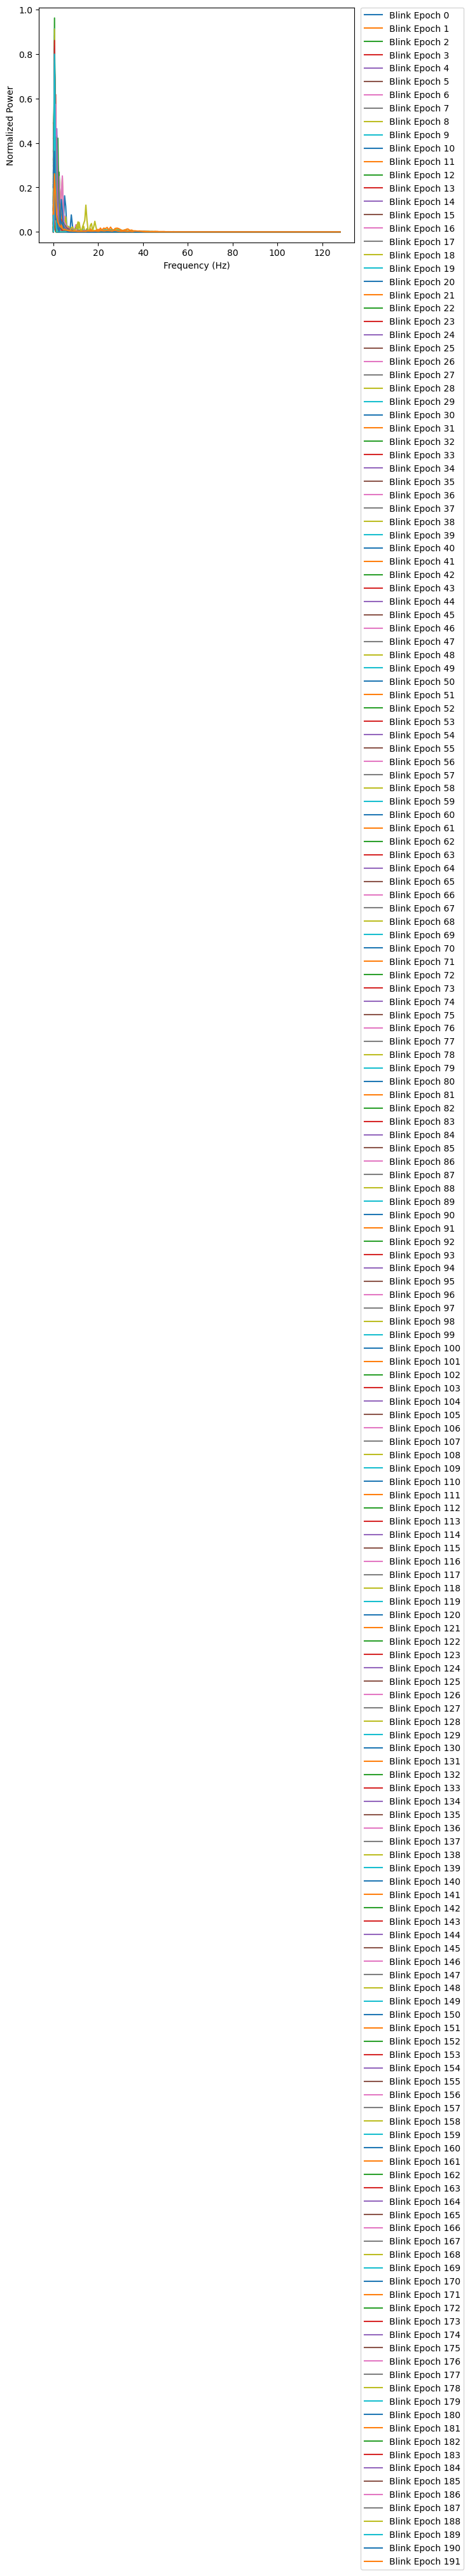

Total number of eye blinks detected:  11


In [9]:
import numpy as np
from scipy.signal import welch

def heaviside(x, threshold=0):
    return np.where(x >= threshold, 1, 0)

blink_indices = []
power_spectra = []

max_freq_bins = 0

for i in range(ica.n_components_):
    component = ica.get_components()[:, i]
    amplitude = max(abs(component))
    threshold = 1.5  # adjust this threshold as needed
    
    blink_signal = heaviside(abs(component) - threshold)
    num_blinks = sum(np.diff(blink_signal) > 0)
    
    if num_blinks > 0:
        blink_indices.append(i)
        print('Component {} has {} large amplitude peaks, possibly eye blinks'.format(i, num_blinks))
        
        # Compute the power spectrum for each blink epoch
        blink_epochs = np.split(component, np.where(np.diff(blink_signal) > 0)[0] + 1)
        for blink_epoch in blink_epochs:
            freq, psd = welch(blink_epoch, fs=ica.info['sfreq'], nperseg=ica.info['sfreq'] * 2)
            psd_normalized = psd / np.sum(psd)
            power_spectra.append(psd_normalized)
            max_freq_bins = max(max_freq_bins, len(freq))

# Pad the power spectra with zeros to have the same number of frequency bins
for i in range(len(power_spectra)):
    power_spectra[i] = np.pad(power_spectra[i], (0, max_freq_bins - len(power_spectra[i])), mode='constant')

# Plot the normalized power spectra for each blink epoch
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for i, psd_normalized in enumerate(power_spectra):
    ax.plot(freq, psd_normalized, label='Blink Epoch {}'.format(i))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Normalized Power')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()

print("Total number of eye blinks detected: ", len(blink_indices))


Effective window size : 0.109 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\Dedu\AppData\Local\Temp\ipykernel_1288\4255613943.py:16: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=28).
  plt.specgram(raw.get_data()[0], Fs=raw_band.info['sfreq'])


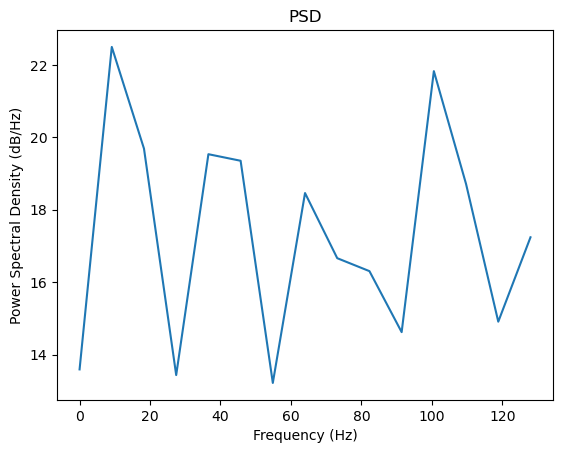

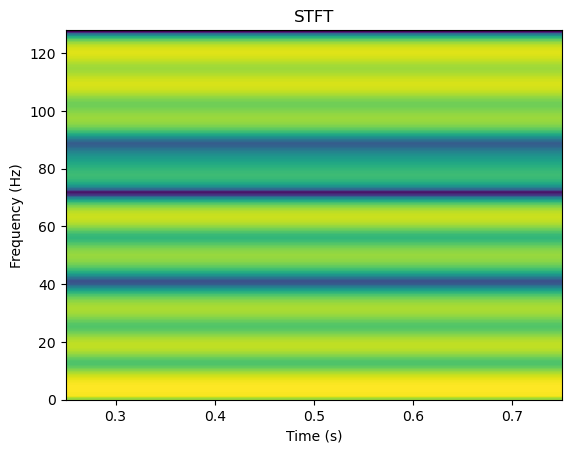

In [10]:
raw_band = raw.copy()

# Calculate power spectral density
n_fft = 28
psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'],n_fft=n_fft)

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psd))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Plot STFT
plt.figure()
plt.specgram(raw.get_data()[0], Fs=raw_band.info['sfreq'])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT')

plt.show()

C:\Users\Dedu\anaconda3\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


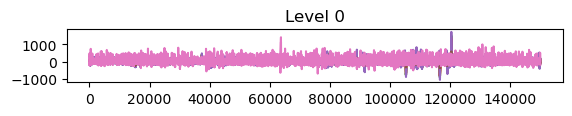

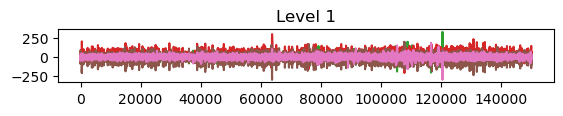

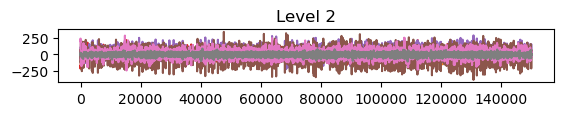

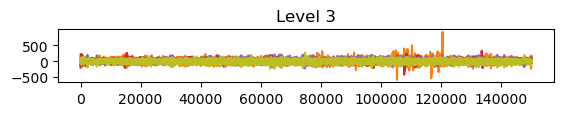

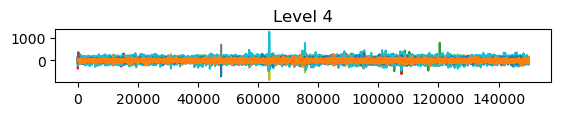

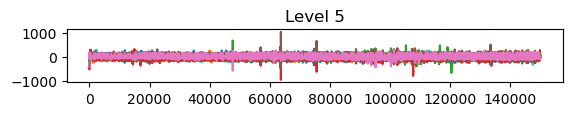

mean_spectrum: [10357.11647592   585.93989327  1461.1131126   1274.15023331
  2143.41854632  1751.31878558]
var_spectrum: [1.05802758e+09 1.47250325e+06 4.95874065e+06 5.46167093e+06
 1.90025151e+07 9.18645860e+06]


In [12]:
import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data=raw.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)

for remaing data apart from first 28 subjects.

In [13]:
data = df2.iloc[:, :-2].values.T 
ch_names = ['Fp1']*150000
# extract the data values and the channel names
ch_types = ['eeg']*150000
# create the info object for the raw data
sfreq = 256  # the sampling frequency of the data in Hz
info = mne.create_info(ch_names, sfreq,ch_types)
# create the raw object
raw = mne.io.RawArray(data, info)


C:\Users\Dedu\AppData\Local\Temp\ipykernel_1288\2379773266.py:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'Fp1'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names, sfreq,ch_types)


Creating RawArray with float64 data, n_channels=150000, n_times=23
    Range : 0 ... 22 =      0.000 ...     0.086 secs
Ready.


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs

picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks
n_components = 20
ica = ICA(n_components=n_components, random_state=0)
ica.fit(raw, picks=picks)


Fitting ICA to data using 150000 channels (please be patient, this may take a while)


C:\Users\Dedu\AppData\Local\Temp\ipykernel_1288\3602276034.py:11: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw, picks=picks)


Selecting by number: 20 components
Fitting ICA took 114.4s.


Method,fastica
Fit,23 iterations on raw data (23 samples)
ICA components,20
Available PCA components,23
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=20, n_times=23
    Range : 0 ... 22 =      0.000 ...     0.086 secs
Ready.


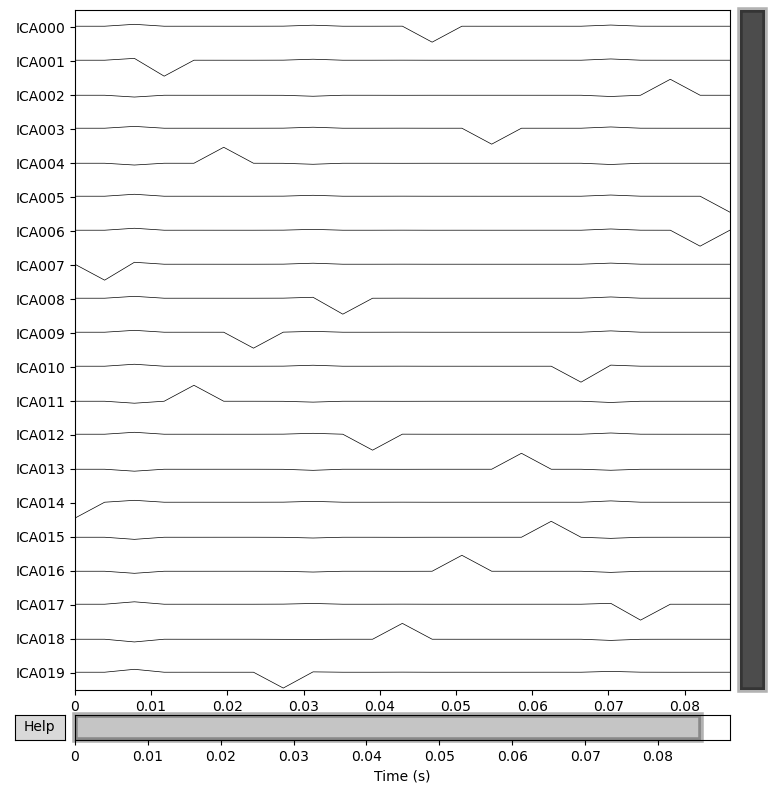

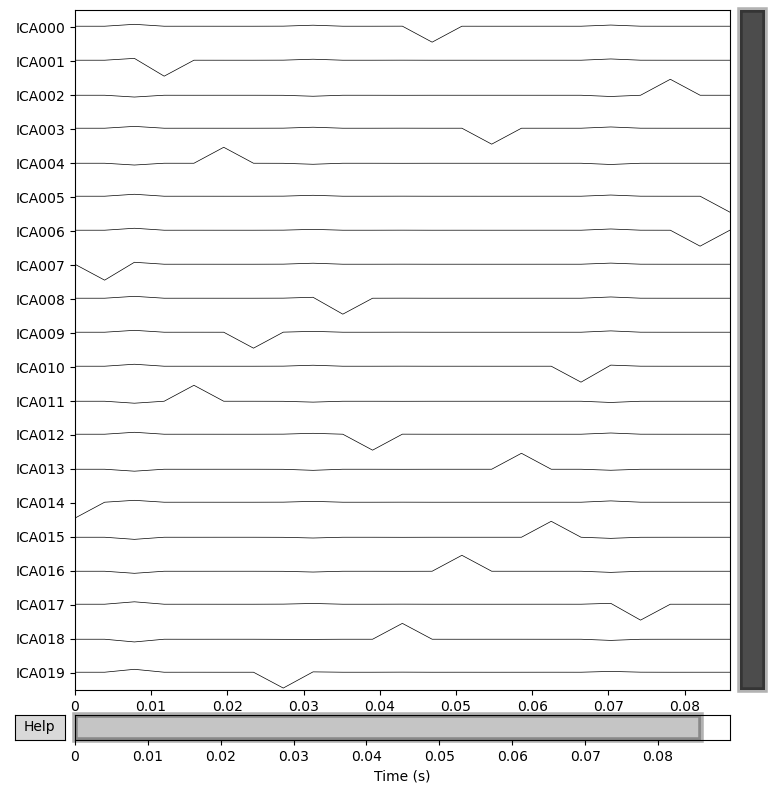

In [15]:
 ica.plot_sources(raw, block=False)

Component 0 has 37 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 189, using nperseg = 189
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 159, using nperseg = 159
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 15, using nperseg = 15
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 51, using nperseg = 51
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 

Component 1 has 24 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 482, using nperseg = 482
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 475, using nperseg = 475
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 125, using nperseg = 125
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 20, using nperseg = 20
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 51

Component 2 has 20 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 477, using nperseg = 477
  warnings.warn('nperseg = {0:d} is greater than input length '


Component 3 has 4 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 158, using nperseg = 158
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 11, using nperseg = 11
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 100, using nperseg = 100
  warnings.warn('nperseg = {0:d} is greater than input length '


Component 4 has 27 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 436, using nperseg = 436
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 408, using nperseg = 408
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 8, using nperseg = 8
  warnings.warn('nperseg = {0:d} is greater than input length '


Component 5 has 10 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 195, using nperseg = 195
  warnings.warn('nperseg = {0:d} is greater than input length '
C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 52, using nperseg = 52
  warnings.warn('nperseg = {0:d} is greater than input length '


Component 6 has 24 large amplitude peaks, possibly eye blinks
Component 7 has 4 large amplitude peaks, possibly eye blinks
Component 8 has 5 large amplitude peaks, possibly eye blinks
Component 9 has 7 large amplitude peaks, possibly eye blinks
Component 10 has 4 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 27, using nperseg = 27
  warnings.warn('nperseg = {0:d} is greater than input length '


Component 11 has 7 large amplitude peaks, possibly eye blinks


C:\Users\Dedu\anaconda3\lib\site-packages\scipy\signal\_spectral_py.py:1999: UserWarning: nperseg = 512 is greater than input length  = 4, using nperseg = 4
  warnings.warn('nperseg = {0:d} is greater than input length '


Component 13 has 6 large amplitude peaks, possibly eye blinks
Component 14 has 3 large amplitude peaks, possibly eye blinks
Component 15 has 13 large amplitude peaks, possibly eye blinks


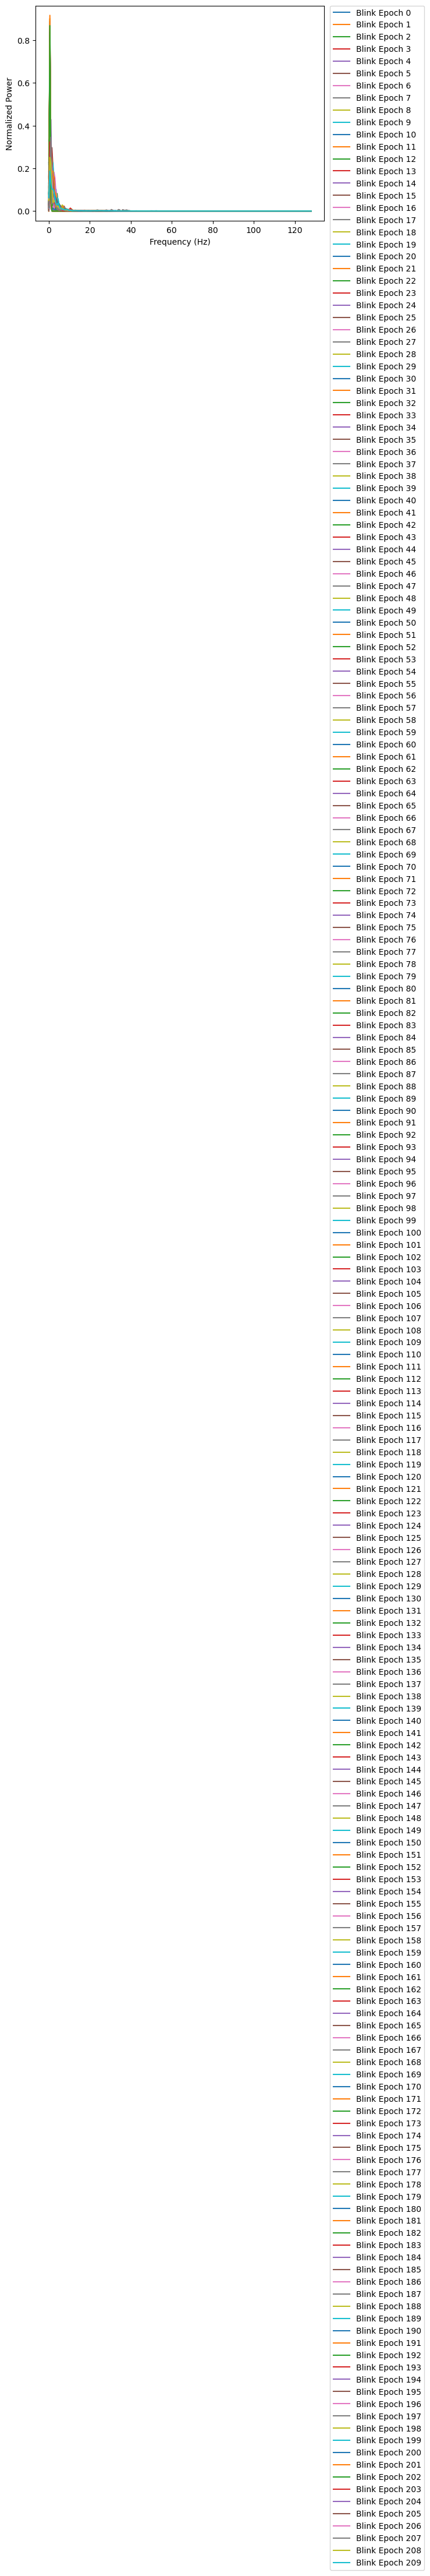

Total number of eye blinks detected:  15


In [16]:
import numpy as np
from scipy.signal import welch

def heaviside(x, threshold=0):
    return np.where(x >= threshold, 1, 0)

blink_indices = []
power_spectra = []

max_freq_bins = 0

for i in range(ica.n_components_):
    component = ica.get_components()[:, i]
    amplitude = max(abs(component))
    threshold = 1.5  # adjust this threshold as needed
    
    blink_signal = heaviside(abs(component) - threshold)
    num_blinks = sum(np.diff(blink_signal) > 0)
    
    if num_blinks > 0:
        blink_indices.append(i)
        print('Component {} has {} large amplitude peaks, possibly eye blinks'.format(i, num_blinks))
        
        # Compute the power spectrum for each blink epoch
        blink_epochs = np.split(component, np.where(np.diff(blink_signal) > 0)[0] + 1)
        for blink_epoch in blink_epochs:
            freq, psd = welch(blink_epoch, fs=ica.info['sfreq'], nperseg=ica.info['sfreq'] * 2)
            psd_normalized = psd / np.sum(psd)
            power_spectra.append(psd_normalized)
            max_freq_bins = max(max_freq_bins, len(freq))

# Pad the power spectra with zeros to have the same number of frequency bins
for i in range(len(power_spectra)):
    power_spectra[i] = np.pad(power_spectra[i], (0, max_freq_bins - len(power_spectra[i])), mode='constant')

# Plot the normalized power spectra for each blink epoch
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for i, psd_normalized in enumerate(power_spectra):
    ax.plot(freq, psd_normalized, label='Blink Epoch {}'.format(i))
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Normalized Power')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()

print("Total number of eye blinks detected: ", len(blink_indices))


In [17]:
type(raw)

mne.io.array.array.RawArray

Effective window size : 0.090 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
C:\Users\Dedu\AppData\Local\Temp\ipykernel_1288\4001556305.py:16: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=23).
  plt.specgram(raw.get_data()[0], Fs=raw_band.info['sfreq'])


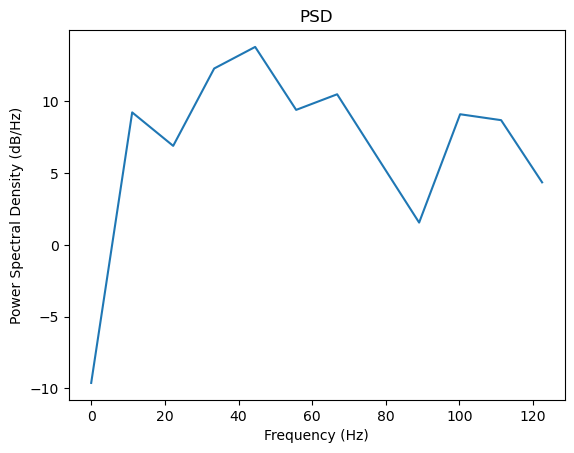

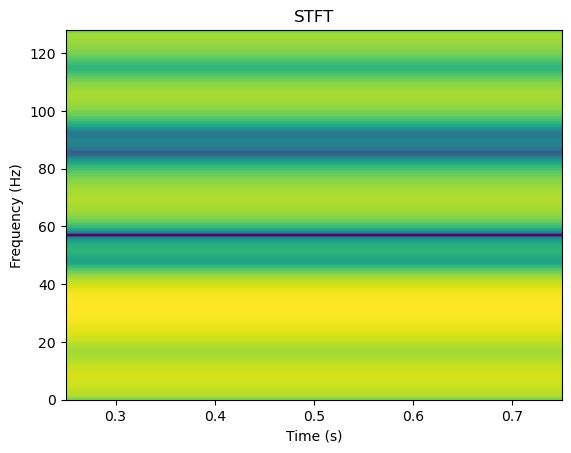

In [18]:
raw_band = raw.copy()

# Calculate power spectral density
n_fft = 23
psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'],n_fft=n_fft)

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psd))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Plot STFT
plt.figure()
plt.specgram(raw.get_data()[0], Fs=raw_band.info['sfreq'])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT')

plt.show()

In [ ]:
import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data=raw.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)